# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Obtain & Scrub Data

##### See obtain_scrub_data folder for work obtaining and scrubbing data

Read csv file with pre-scrubbed data into pandas

In [2]:
df = pd.read_csv('Scrubbed_wb_dataset.csv')
df.head()

,country_name,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population)
0,Afghanistan,458.370738,9.0,39.396000,18.558666,0.5,2.302373,21.618689,2.311817,25.754
1,Albania,4201.077084,9.0,43.662998,14.438802,2.9,1.411091,41.471734,-0.426007,61.229
2,Algeria,3098.851733,10.0,59.638000,38.383538,1.9,1.951768,17.671559,1.933950,73.189
3,Angola,1028.564719,6.0,41.730999,27.280625,0.8,17.145320,50.293109,3.242983,66.177
4,Argentina,9631.763691,14.0,78.863998,17.345827,5.0,53.548304,42.917039,0.993397,91.991


Confirm that data is already scrubbed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   country_name                                                           174 non-null    object 
 1   Adjusted net national income per capita (current US$)                  174 non-null    float64
 2   Compulsory education, duration (years)                                 174 non-null    float64
 3   Employment in services (% of total employment) (modeled ILO estimate)  174 non-null    float64
 4   Gross savings (% of GNI)                                               174 non-null    float64
 5   Hospital beds (per 1,000 people)                                       174 non-null    float64
 6   Inflation, consumer prices (annual %)                                  174 non-null    flo

# Explore Data

Create df of dataset descriptive statistics

In [4]:
df.describe()

,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population)
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,11264.866908,9.800225,56.028356,22.586987,2.794392,6.857371,41.422251,1.328329,58.730615
std,15297.813350,2.412771,17.205415,13.090724,2.331058,24.683743,9.420256,1.115227,22.799458
min,205.600481,5.000000,6.537000,-74.007500,0.100000,-4.294873,7.495650,-1.805226,13.250000
25%,1390.178979,9.000000,44.425500,15.835062,1.100000,1.041032,39.258858,0.492405,40.977500
50%,4275.860510,9.961957,58.325500,22.586987,2.100000,2.485757,44.715021,1.332839,58.899500
75%,13625.797647,11.000000,69.698999,28.706894,3.975000,4.800793,47.400305,2.172113,77.935250
max,66019.072940,17.000000,87.461998,66.786484,13.400000,254.948535,55.428612,4.469239,100.000000


Plot distributions of country features

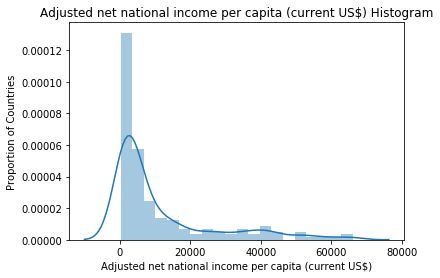

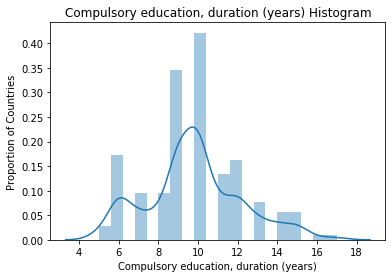

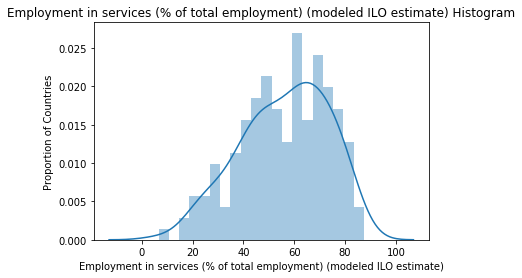

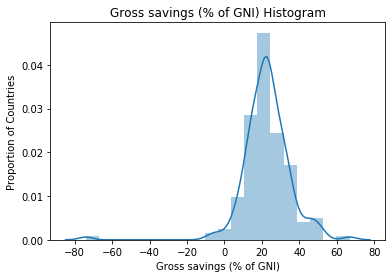

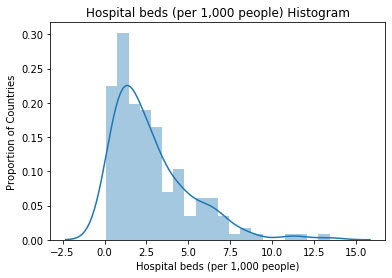

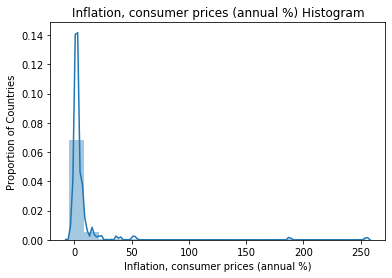

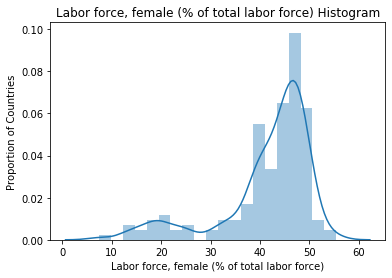

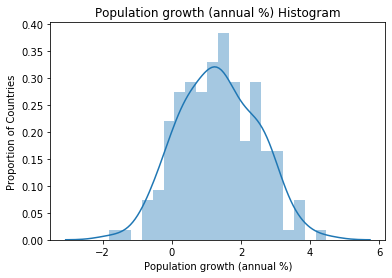

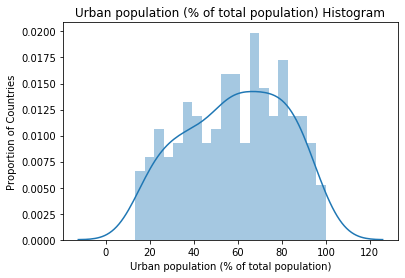

In [5]:
for col in df.columns[1:]:
    fig, ax = plt.subplots()
    sns.distplot(df[col], bins=20, ax=ax)
    ax.set_ylabel('Proportion of Countries')
    ax.set_title(f'{col} Histogram')

# Model data

Create x variable from data

In [6]:
x = df.drop(columns='country_name')

Apply standard scaler to data

In [7]:
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)
x.head()

,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population)
0,-0.708447,-0.332619,-0.969483,-0.308611,-0.987111,-0.185067,-2.108299,0.884418,-1.450551
1,-0.463084,-0.332619,-0.720764,-0.624236,0.045436,-0.221279,0.005268,-1.577616,0.109897
2,-0.535343,0.083038,0.210402,1.210181,-0.384792,-0.199312,-2.528513,0.544614,0.635985
3,-0.671066,-1.579591,-0.833378,0.359582,-0.858043,0.417993,0.944397,1.721783,0.327546
4,-0.107062,1.745667,1.331066,-0.401527,0.948914,1.897025,0.159136,-0.301193,1.463034


Fit Isolation Forest Model to data

In [8]:
isfo = IsolationForest(n_estimators=1000)
if_pred = isfo.fit_predict(x)
if_pred_df = pd.DataFrame(if_pred, columns=['Outlier'])
if_pred_df['country_name'] = df['country_name']
if_df = pd.merge(x, if_pred_df, left_index=True, right_index=True)
if_df.set_index('country_name', inplace=True)
if_df[if_df['Outlier']==-1]

,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population),Outlier
country_name,,,,,,,,,,
Argentina,-0.107062,1.745667,1.331066,-4.015275e-01,0.948914,1.897025,0.159136,-0.301193,1.463034,-1
Bahrain,0.578834,-0.332619,0.461919,6.932628e-01,-0.341769,-0.193906,-2.304553,2.824515,1.348799,-1
Burundi,-0.725018,0.051412,-2.884800,-1.397374e+00,-0.858043,-0.306514,1.106888,1.619253,-1.995466,-1
Japan,1.352100,-0.332619,0.964428,3.271903e-01,4.562827,-0.259232,0.285871,-1.382468,1.450145,-1
Liberia,-0.709989,-1.579591,-0.534356,-7.400145e+00,-0.858043,0.678761,0.637880,0.988173,-0.312997,-1
Luxembourg,3.207314,0.914353,1.832235,2.686623e-01,0.862868,-0.207781,0.487276,0.555368,1.429251,-1
Malta,1.050567,0.498695,1.455980,8.129235e-01,0.819845,-0.211895,-0.059481,2.089092,1.581227,-1
Qatar,2.640092,-0.332619,-0.674832,1.933729e+00,-0.685952,-0.305696,-2.944754,0.419917,1.779610,-1
Singapore,2.550931,-1.579591,1.635859,1.884783e+00,-0.169678,-0.255645,0.036087,-0.165507,1.815328,-1


Fit Local Outlier Factor to data

In [9]:
lof = LocalOutlierFactor()
lof_pred = lof.fit_predict(x)
lof_pred_df = pd.DataFrame(lof_pred, columns=['Outlier'])
lof_pred_df['country_name'] = df['country_name']
lof_df = pd.merge(x, lof_pred_df, left_index=True, right_index=True)
lof_df.set_index('country_name', inplace=True)
lof_df[lof_df['Outlier']==-1].round(1)

,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population),Outlier
country_name,,,,,,,,,,
Japan,1.4,-0.3,1.0,0.3,4.6,-0.3,0.3,-1.4,1.5,-1
Liberia,-0.7,-1.6,-0.5,-7.4,-0.9,0.7,0.6,1.0,-0.3,-1
South Sudan,-0.7,-0.7,-1.5,-1.2,-0.9,7.4,0.8,-0.5,-1.7,-1
"Venezuela, RB",0.2,3.0,1.1,-1.0,-0.9,10.1,-0.2,-2.3,1.3,-1


Fit One Class SVM model to data

In [10]:
ocsvm = OneClassSVM(nu=.1)
ocsvm_pred = ocsvm.fit_predict(x)
ocsvm_pred_df = pd.DataFrame(ocsvm_pred, columns=['Outlier'])
ocsvm_pred_df['country_name'] = df['country_name']
ocsvm_df = pd.merge(x, ocsvm_pred_df, left_index=True, right_index=True)
ocsvm_df.set_index('country_name', inplace=True)
ocsvm_df[ocsvm_df['Outlier']==-1]

,Adjusted net national income per capita (current US$),"Compulsory education, duration (years)",Employment in services (% of total employment) (modeled ILO estimate),Gross savings (% of GNI),"Hospital beds (per 1,000 people)","Inflation, consumer prices (annual %)","Labor force, female (% of total labor force)",Population growth (annual %),Urban population (% of total population),Outlier
country_name,,,,,,,,,,
Argentina,-0.107062,1.745667,1.331066,-4.015275e-01,0.948914,1.897025,0.159136,-0.301193,1.463034,-1
Burundi,-0.725018,0.051412,-2.884800,-1.397374e+00,-0.858043,-0.306514,1.106888,1.619253,-1.995466,-1
France,1.545199,2.161324,1.264850,1.747459e-02,1.594255,-0.233583,0.713964,-1.068414,0.966769,-1
Guyana,-0.473111,-1.579591,0.249573,1.045477e+00,-0.513861,-0.193808,-0.220507,-0.761290,-1.409423,-1
Japan,1.352100,-0.332619,0.964428,3.271903e-01,4.562827,-0.259232,0.285871,-1.382468,1.450145,-1
Liberia,-0.709989,-1.579591,-0.534356,-7.400145e+00,-0.858043,0.678761,0.637880,0.988173,-0.312997,-1
Libya,-0.303374,-0.332619,0.204457,3.386142e+00,0.389618,-0.172738,-0.790759,0.127200,0.952869,-1
Luxembourg,3.207314,0.914353,1.832235,2.686623e-01,0.862868,-0.207781,0.487276,0.555368,1.429251,-1
Malta,1.050567,0.498695,1.455980,8.129235e-01,0.819845,-0.211895,-0.059481,2.089092,1.581227,-1


# Analyze Results

Create tsne representation of world bank dataset

In [11]:
tsne_dataset = x
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3000)
tsne_output = tsne.fit_transform(x)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])
tsne_df.head()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 174 samples in 0.000s...
[t-SNE] Computed neighbors for 174 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 174 / 174
[t-SNE] Mean sigma: 1.598198
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.930618
[t-SNE] KL divergence after 1250 iterations: 0.326151


,d1,d2
0,2.946440,-1.178425
1,-0.382899,3.296732
2,4.404884,0.391008
3,-2.549221,-3.057445
4,2.266826,5.542538


Plot tsne representation of world bank dataset

Text(0.5, 1.0, 'World Bank Country Data t-sne Plot')

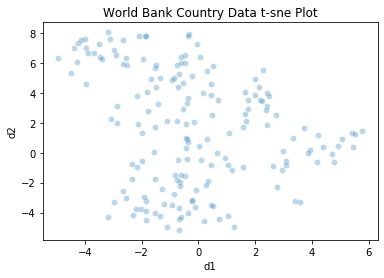

In [12]:
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('World Bank Country Data t-sne Plot')

Plot tsne representation of world bank dataset with Isolation Forest outliers

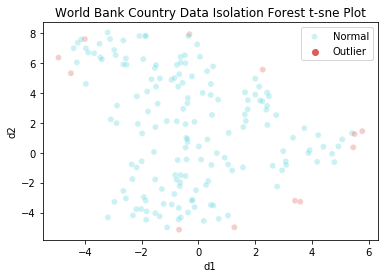

In [13]:
tsne_plot = sns.scatterplot(
    hue = if_pred,
    x="d1", y="d2",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('World Bank Country Data Isolation Forest t-sne Plot')
tsne_plot.legend(['Normal', 'Outlier'])

Plot tsne representation of world bank dataset with Local Outlier Factor outliers

Text(0.5, 1.0, 'World Bank Country Data Local Outlier Factor t-sne Plot')

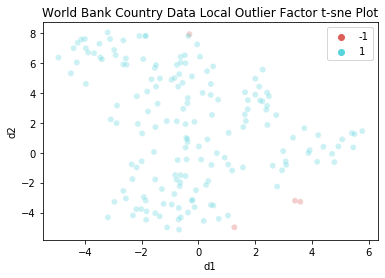

In [14]:
tsne_plot = sns.scatterplot(
    hue = lof_pred,
    x="d1", y="d2",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('World Bank Country Data Local Outlier Factor t-sne Plot')

Plot tsne representation of world bank dataset with One Class SVM outliers

Text(0.5, 1.0, 'World Bank Country Data t-sne Plot')

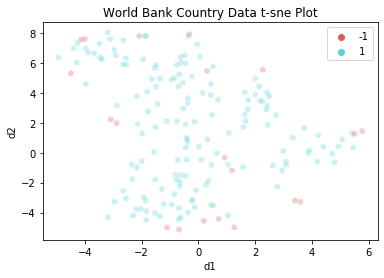

In [15]:
tsne_plot = sns.scatterplot(
    hue = ocsvm_pred,
    x="d1", y="d2",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('World Bank Country Data t-sne Plot')